In [69]:
import subprocess
from urllib.parse import urlparse
try:
    import urllib.request as urllib2
except ImportError:
    import urllib2
from urllib.parse import urlencode
import socket
from multiprocessing import Queue
import threading
import getopt
import sys
import os
import networkx as nx
from bs4 import BeautifulSoup
import matplotlib

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (7, 5), 'figure.dpi': 80})
import threading, queue
import re
import pandas as pd
from cdlib import algorithms

In [70]:
url = "https://en.wikipedia.org/wiki/Science_fiction_film"

In [77]:
q = queue.Queue()
max_threads=50
next_url=queue.Queue()
crawled_urls=[]

In [84]:
def get_links_from_page(url):
    urllist = []
    try:
      res=urllib2.urlopen(url)
      htmlpage=res.read()
    except:
      return urllist

    try:
      page=BeautifulSoup(htmlpage)
    except:
      return urllist

    #refs=page.findAll("a")
    pattern = re.compile("/wiki/[\w]+$")
    refs = page.findAll("a", href=pattern)[25:35]
    for a in refs:
        link = a['href']
        urllist.append(link)
    
#     links = soup.find_all('a')
#     for link in links:
#         link_url = link.get('href')
#         if link_url is not None:
#             base_url = '{uri.scheme}://{uri.netloc}'.format(uri=urlparse(url))
#                     #page.links.append(base_url + link_url)
#             urllist.append(base_url + link_url)


    return urllist

In [85]:
def find_links(url_tuple,graph):
    '''Crawls to a given depth using a tuple structure to tag urls with their depth'''
    global crawled_urls, next_url, max_depth
    url = url_tuple[0]
    depth = url_tuple[1]
    if (depth < 5) :
      links = get_links_from_page(url)
      for link in links:
        '''These two lines create the graph'''
        graph.add_node(link)
        graph.add_edge(url,link)
        '''If the link has not been crawled yet, add it in the queue with additional depth'''
        if link not in crawled_urls:
          next_url.put((link, depth+1))
          crawled_urls.append(link)
    print(crawled_urls)
    return 

class crawler_thread(threading.Thread):
    def __init__(self,queue,graph):
      threading.Thread.__init__(self)
      self.to_be_crawled=queue
      self.graph=graph
      while self.to_be_crawled.empty() is False:
        find_links(self.to_be_crawled.get(), self.graph)

# def draw_graph(graph, graph_file_name):
# 	'''Function to draw the graph and save the files'''
# 	nx.draw(graph,with_labels=False)
# 	#nx.write_dot(graph,os.cwd()+graph_file_name+'.dot')
# 	plt.savefig(os.getcwd()+graph_file_name+'.png')

In [86]:
def calculatePageRank(url):
  print(str(url))
  root_url = url
  parser_flag = 'beautifulsoup'
  max_depth=5

  next_url.put((root_url,0))
  crawled_urls.append(root_url)
  ip_list=[]
  g=nx.Graph()
  g.add_node(root_url)
  thread_list=[]

  for i in range(max_threads): #changed
    t=crawler_thread(next_url,g)
    t.daemon=True
    t.start()
    thread_list.append(t)

  for t in thread_list:
    t.join()

  nx.draw(g)
  plt.savefig("image.png")
  plt.show()
  coms = algorithms.walktrap(g)
#   pagerank = nx.pagerank(g, alpha=0.85, personalization=None,  weight='weight', dangling=None)
#   edgeNumber = g.number_of_edges()
#   nodeNumber = g.number_of_nodes()
#   nodesize=[g.degree(n)*10 for n in g]
#   pos=nx.spring_layout(g,iterations=20)

#   nx.draw(g,with_labels=False)
#   nx.draw_networkx_nodes(g,pos,node_size=nodesize,node_color='r')
#   nx.draw_networkx_edges(g,pos)
#   plt.figure(figsize=(5,5))
#   plt.show()
#   # return np.array(len(ip_list), pagerank.get(url), edgeNumber, nodeNumber)

#   draw_graph(g, "image")

#   return pd.Series([pagerank.get(url), edgeNumber, nodeNumber], index=['pagerank','edges', 'nodes'])

https://en.wikipedia.org/wiki/Science_fiction_film
['https://en.wikipedia.org/wiki/Science_fiction_film', 'https://en.wikipedia.org/wiki/Science_fiction_film', '/wiki/Time_travel', '/wiki/Science_fiction', '/wiki/Politics', '/wiki/Social_issue', '/wiki/Human_condition', '/wiki/Genre', '/wiki/Silent_cinema', '/wiki/A_Trip_to_the_Moon', '/wiki/Special_effect', '/wiki/B_movies']
['https://en.wikipedia.org/wiki/Science_fiction_film', 'https://en.wikipedia.org/wiki/Science_fiction_film', '/wiki/Time_travel', '/wiki/Science_fiction', '/wiki/Politics', '/wiki/Social_issue', '/wiki/Human_condition', '/wiki/Genre', '/wiki/Silent_cinema', '/wiki/A_Trip_to_the_Moon', '/wiki/Special_effect', '/wiki/B_movies']
['https://en.wikipedia.org/wiki/Science_fiction_film', 'https://en.wikipedia.org/wiki/Science_fiction_film', '/wiki/Time_travel', '/wiki/Science_fiction', '/wiki/Politics', '/wiki/Social_issue', '/wiki/Human_condition', '/wiki/Genre', '/wiki/Silent_cinema', '/wiki/A_Trip_to_the_Moon', '/wiki/

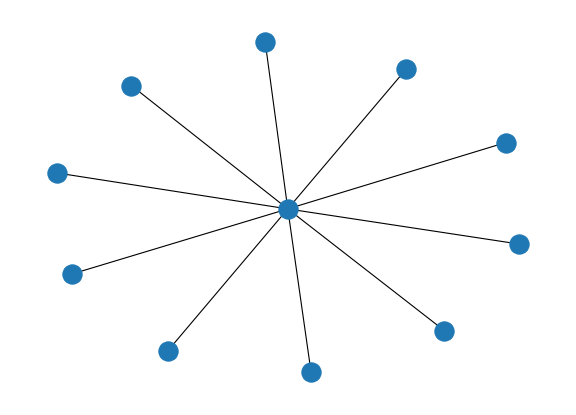

ValueError: invalid literal for int() with base 10: 'https://en.wikipedia.org/wiki/Science_fiction_film'

In [87]:
calculatePageRank(url)